In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv("Student_Performance.csv")

In [2]:
df.info

<bound method DataFrame.info of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      S

In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.dropna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


<AxesSubplot:ylabel='Count'>

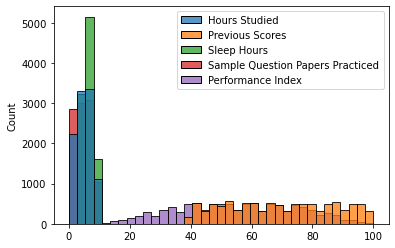

In [5]:
sn.histplot(df)

In [6]:
df["Extracurricular Activities"].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

<BarContainer object of 2 artists>

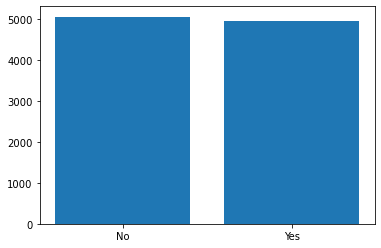

In [7]:
se=df["Extracurricular Activities"].value_counts()
labels=["No","Yes"]
plt.bar(labels,se)

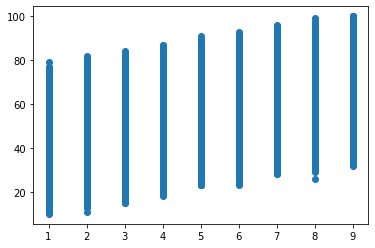

In [8]:
plt.scatter(df["Hours Studied"],df["Performance Index"])

<BarContainer object of 2 artists>

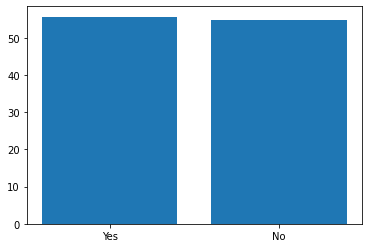

In [9]:
z1=df["Performance Index"][df["Extracurricular Activities"]=='Yes']
z2=df["Performance Index"][df["Extracurricular Activities"]=='No']
l=[sum(z1)/len(z1),sum(z2)/len(z2)]
l2=['Yes','No']
plt.bar(l2,l)

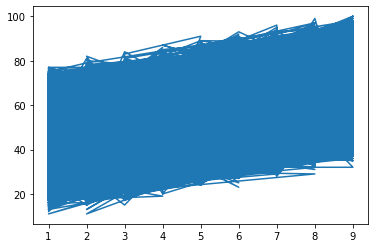

In [10]:
z3=df["Hours Studied"][df["Extracurricular Activities"]=='Yes']
z4=df["Hours Studied"][df["Extracurricular Activities"]=='No']
plt.plot(z3,z1)

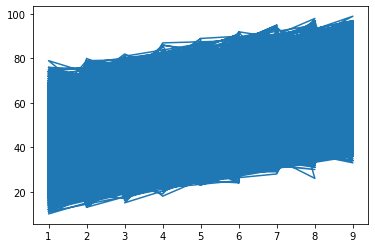

In [11]:
plt.plot(z4,z2)

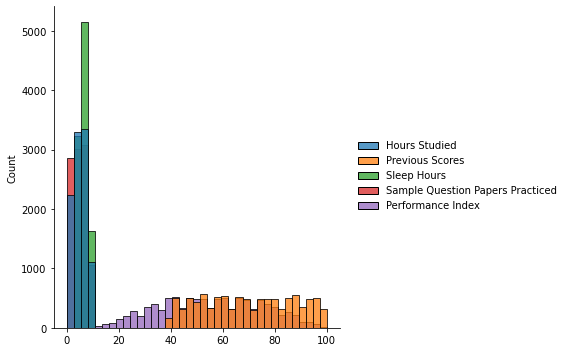

In [12]:
sn.displot(df)

<AxesSubplot:>

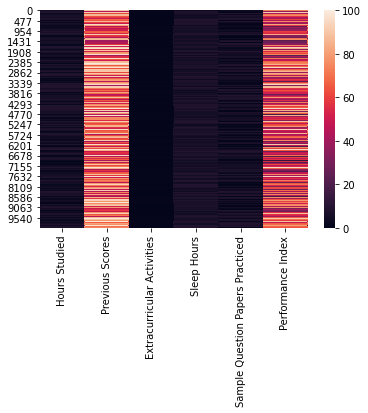

In [13]:
df2=df.replace({
    "Yes":1,
    "No":0
})
sn.heatmap(df2)

In [17]:
df3=df.sort_values("Performance Index",ascending=False)
df4=df3.head(len(df)//10)
sn.catplot(df4)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

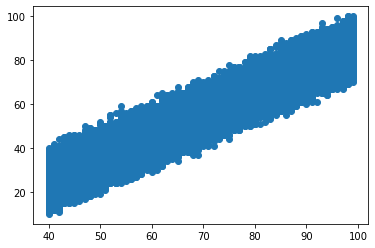

In [15]:
plt.scatter(df["Previous Scores"],df["Performance Index"])

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
df5=df.drop('Performance Index',axis='columns')
df6=df5.drop('Extracurricular Activities',axis='columns')
X_train, X_test, y_train, y_test = train_test_split(df6,df["Performance Index"], test_size= 0.1)
reg.fit(df6,df["Performance Index"])
score = reg.score(X_test, y_test)
print(score)

0.9880784909336617
